# Lecture 17


### Plan:
1. Set up imports
2. Load Data
3. Use standard scaler
4. Run PCA/LDA/t-SNE
5. Make plots of each output

In [7]:
#set up imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

In [8]:
# load data
rhodo_df = pd.read_csv('rhodo_data.csv')

print(rhodo_df.shape)

rhodo_df

(18, 87)


,sample,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,D-fructose-6-phosphate,D-GLC-6-phosphate,D-xylose,D-xylulose-5-phosphate,Fumaric acid,Glycine,Glycolic acid,Heptadecanoic acid,Lactic acid,Lactobionic acid,L-aspartic acid,L-citrulline,L-cysteine,L-glutamic acid,L-glutamine,L-homoserine,L-isoleucine,L-leucine,L-lysine,L-malic acid,L-ornithine,L-PHEnylalanine,L-proline,L-pyroglutamic acid,L-serine,L-threonine,L-tyrosine,L-valine,Maleamic acid,...,Oxalic acid,Palmitic acid,Palmitoleic acid,Phosphate Ion,Pyrophosphate,Scyllo-inositol,Sedoheptulose anhydride monohydrate,Sedoheptulose-7-phosphate,Stearic acid,Succinic acid,Thymine,Trehalose,Trehalose-6-phosphate,Uracil,"1,4-butanediol",1-hexadecanol,2-hydroxypyridine,2-phosphoglyceric acid,Adenosine-5-monophosphate,"Benzene-1,2,4-triol",Ethanolamine,Gluconolactone,Glycerol 3-phosphate,Glyoxylic acid,Guanosine-5'-monophosphate,Hypoxanthine,Isomaltose,Lauric acid,L-methionine sulfoxide,Maltotriitol,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,SG_1,3.615204e+05,158448.34340,322605.073300,6.771950e+05,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,317216.41940,4.944236e+05,4.236583e+05,2.028736e+06,183339.35010,168314.14890,1.998364e+06,141241.06390,105736.29230,176995.38630,4.575751e+05,4.152843e+06,5.098021e+05,5739.861804,71429120.07,7.045657e+06,341744.977800,1.246732e+06,6.178575e+05,4731910.946,54159.01614,8.377975e+05,1.942904e+05,3.288799e+05,4.508399e+07,1.809433e+06,3.393411e+06,1.282347e+06,1.598031e+06,1.051553e+06,...,241865.95990,2285366.790,252458.0528,1.172632e+08,3.687845e+06,557903.3325,147984.9897,171422.45550,1591377.409,420150.0547,254280.1055,2.242938e+08,184039.76920,280351.38540,64897.56241,13567.059110,1.264148e+06,624391.35260,65417.31696,1.214174e+07,572394.7350,6.689470e+05,2.939437e+06,473743.64050,1.062403e+07,0.000000,69647.72346,55843.23684,57650.95129,0.000000,197109.09810,154515.48230,912327.96570,54886.78433,53255.60385,1.567848e+06,79592.74450,41592.877790,106902.772700,178790.735700
1,SG_2,2.273096e+05,213583.36610,312837.429400,5.758221e+05,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,336929.76300,4.412232e+05,3.995151e+05,1.707081e+06,84530.83179,117022.54130,1.737380e+06,189167.03410,44903.26676,150557.55590,5.018989e+05,1.893980e+06,4.890134e+05,15278.498670,60880610.60,3.621625e+06,171768.013100,7.760702e+05,7.033602e+04,4416971.288,123540.04070,7.277427e+05,1.318997e+05,1.703756e+05,4.467901e+07,1.038814e+06,1.857196e+06,2.234590e+06,9.528409e+05,3.560651e+05,...,250631.68770,2235888.515,113847.1702,1.024471e+08,5.387499e+06,445174.8589,117583.5967,151294.60510,1183758.311,134013.5243,313387.9610,6.181174e+07,140529.98630,52275.23212,34278.06886,24618.999430,9.609393e+05,321497.49020,70673.67258,9.465403e+06,173524.7746,6.103118e+05,2.719319e+06,189109.60020,9.144315e+06,47579.838920,0.00000,64953.82594,33682.73078,0.000000,132211.94520,178537.38880,546466.68580,13966.87377,54527.47672,9.428716e+05,101591.31180,125701.005500,92505.279630,61108.725740
2,SG_3,3.980749e+05,211939.49670,296180.631000,8.199962e+05,618736.8906,43765.31576,1604466.573,2008970.447,110175.16010,515591.83000,5.323748e+05,4.653564e+05,2.405661e+06,130904.78960,143363.60650,1.118410e+06,132736.21820,53495.14638,156252.92980,4.597114e+05,3.448165e+06,5.072352e+05,4389.991933,88380186.09,6.079385e+06,224865.825600,7.713735e+05,2.068005e+05,4194140.777,143057.36800,7.538035e+05,9.601237e+06,1.284917e+04,4.494343e+07,1.848038e+06,3.531632e+06,1.192128e+06,1.052847e+06,7.593623e+05,...,284192.78100,2655466.125,351898.9702,1.115383e+08,5.802250e+06,529896.0772,123273.3315,160372.28170,1949812.691,360624.7284,434601.2863,2.063216e+08,125707.18150,51637.03103,26890.95132,11800.426210,1.087308e

In [9]:
#preprocess the data
labels = rhodo_df['sample']

# remove labels from df
rhodo_df = rhodo_df.drop('sample', axis=1)

#standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rhodo_df)

scaled_data

rhodo_df

,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,D-fructose-6-phosphate,D-GLC-6-phosphate,D-xylose,D-xylulose-5-phosphate,Fumaric acid,Glycine,Glycolic acid,Heptadecanoic acid,Lactic acid,Lactobionic acid,L-aspartic acid,L-citrulline,L-cysteine,L-glutamic acid,L-glutamine,L-homoserine,L-isoleucine,L-leucine,L-lysine,L-malic acid,L-ornithine,L-PHEnylalanine,L-proline,L-pyroglutamic acid,L-serine,L-threonine,L-tyrosine,L-valine,Maleamic acid,Methyl phosphate,...,Oxalic acid,Palmitic acid,Palmitoleic acid,Phosphate Ion,Pyrophosphate,Scyllo-inositol,Sedoheptulose anhydride monohydrate,Sedoheptulose-7-phosphate,Stearic acid,Succinic acid,Thymine,Trehalose,Trehalose-6-phosphate,Uracil,"1,4-butanediol",1-hexadecanol,2-hydroxypyridine,2-phosphoglyceric acid,Adenosine-5-monophosphate,"Benzene-1,2,4-triol",Ethanolamine,Gluconolactone,Glycerol 3-phosphate,Glyoxylic acid,Guanosine-5'-monophosphate,Hypoxanthine,Isomaltose,Lauric acid,L-methionine sulfoxide,Maltotriitol,Maltotriose,Melibiose,O-phospho-L-serine,PhlorobenzoPHEnone,Phytanic acid,Porphine,Shikimate-3-phosphate,Turanose,Unknown - Carbohydrate 001,Unknown - Carbohydrate 002
0,3.615204e+05,158448.34340,322605.073300,6.771950e+05,710902.5555,21587.08363,1742924.769,2187317.706,73643.82800,317216.41940,4.944236e+05,4.236583e+05,2.028736e+06,183339.35010,168314.14890,1.998364e+06,141241.06390,105736.29230,176995.38630,4.575751e+05,4.152843e+06,5.098021e+05,5739.861804,71429120.07,7.045657e+06,341744.977800,1.246732e+06,6.178575e+05,4731910.946,54159.01614,8.377975e+05,1.942904e+05,3.288799e+05,4.508399e+07,1.809433e+06,3.393411e+06,1.282347e+06,1.598031e+06,1.051553e+06,161262.61590,...,241865.95990,2285366.790,252458.0528,1.172632e+08,3.687845e+06,557903.3325,147984.9897,171422.45550,1591377.409,420150.0547,254280.1055,2.242938e+08,184039.76920,280351.38540,64897.56241,13567.059110,1.264148e+06,624391.35260,65417.31696,1.214174e+07,572394.7350,6.689470e+05,2.939437e+06,473743.64050,1.062403e+07,0.000000,69647.72346,55843.23684,57650.95129,0.000000,197109.09810,154515.48230,912327.96570,54886.78433,53255.60385,1.567848e+06,79592.74450,41592.877790,106902.772700,178790.735700
1,2.273096e+05,213583.36610,312837.429400,5.758221e+05,510742.4749,30589.63167,1362157.065,2078919.836,85094.11759,336929.76300,4.412232e+05,3.995151e+05,1.707081e+06,84530.83179,117022.54130,1.737380e+06,189167.03410,44903.26676,150557.55590,5.018989e+05,1.893980e+06,4.890134e+05,15278.498670,60880610.60,3.621625e+06,171768.013100,7.760702e+05,7.033602e+04,4416971.288,123540.04070,7.277427e+05,1.318997e+05,1.703756e+05,4.467901e+07,1.038814e+06,1.857196e+06,2.234590e+06,9.528409e+05,3.560651e+05,284211.23810,...,250631.68770,2235888.515,113847.1702,1.024471e+08,5.387499e+06,445174.8589,117583.5967,151294.60510,1183758.311,134013.5243,313387.9610,6.181174e+07,140529.98630,52275.23212,34278.06886,24618.999430,9.609393e+05,321497.49020,70673.67258,9.465403e+06,173524.7746,6.103118e+05,2.719319e+06,189109.60020,9.144315e+06,47579.838920,0.00000,64953.82594,33682.73078,0.000000,132211.94520,178537.38880,546466.68580,13966.87377,54527.47672,9.428716e+05,101591.31180,125701.005500,92505.279630,61108.725740
2,3.980749e+05,211939.49670,296180.631000,8.199962e+05,618736.8906,43765.31576,1604466.573,2008970.447,110175.16010,515591.83000,5.323748e+05,4.653564e+05,2.405661e+06,130904.78960,143363.60650,1.118410e+06,132736.21820,53495.14638,156252.92980,4.597114e+05,3.448165e+06,5.072352e+05,4389.991933,88380186.09,6.079385e+06,224865.825600,7.713735e+05,2.068005e+05,4194140.777,143057.36800,7.538035e+05,9.601237e+06,1.284917e+04,4.494343e+07,1.848038e+06,3.531632e+06,1.192128e+06,1.052847e+06,7.593623e+05,239752.17310,...,284192.78100,2655466.125,351898.9702,1.115383e+08,5.802250e+06,529896.0772,123273.3315,160372.28170,1949812.691,360624.7284,434601.2863,2.063216e+08,125707.18150,51637.03103,

In [16]:
#define and run PCA
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_data)

#convert dataframe
pca_df = pd.DataFrame(data=pca_data, columns=['PC 1', 'PC 2'])


#add labels
pca_df = pd.concat([pca_df, labels], axis=1)

pca_df


,PC 1,PC 2,sample
0,1.626407,6.123725,SG_1
1,0.416424,5.379444,SG_2
2,0.603286,6.673287,SG_3
3,-7.718434,2.521469,GLC_1
4,-7.744082,3.409572,GLC_2
5,-7.179410,0.775556,GLC_3
6,-3.730115,-5.164253,PHE_1
7,-3.972550,-4.976868,PHE_2
8,-4.361938,-5.511135,PHE_3
9,-2.597531,-0.992549,GLC/PHE_1


Text(0.5, 1.0, 'PCA')

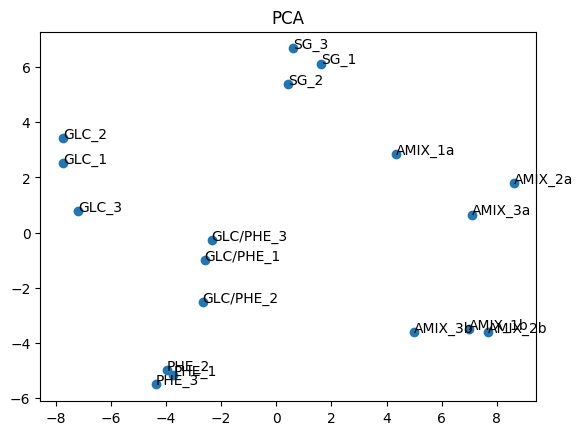

In [19]:
#plot the data
plt.scatter(pca_df['PC 1'], pca_df['PC 2'])

#add the lables

for i,txt in enumerate(labels):
    plt.annotate(txt, (pca_df['PC 1'][i], pca_df['PC 2'][i]))
    #print(i, txt)


plt.title('PCA')

In [25]:
#prepare data for LDA
group_labels = [label.split('_')[0] for label in labels]

#run lda
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(scaled_data, group_labels)

#convert to data frame
lda_df = pd.DataFrame(data=lda_data, columns=['LD 1', 'LD 2'])

#add group names
lda_df['group_label'] = group_labels

lda_df

,LD 1,LD 2,group_label
0,-0.023103,-3.150491,SG
1,1.083295,-1.704730,SG
2,1.505712,-3.014061,SG
3,8.247862,-1.054367,GLC
4,9.031182,-2.422920,GLC
5,6.120516,0.458189,GLC
6,0.505533,4.534567,PHE
7,0.707492,2.699511,PHE
8,-0.371955,3.962282,PHE
9,-0.003778,1.705918,GLC/PHE


Text(0.5, 1.0, 'LDA')

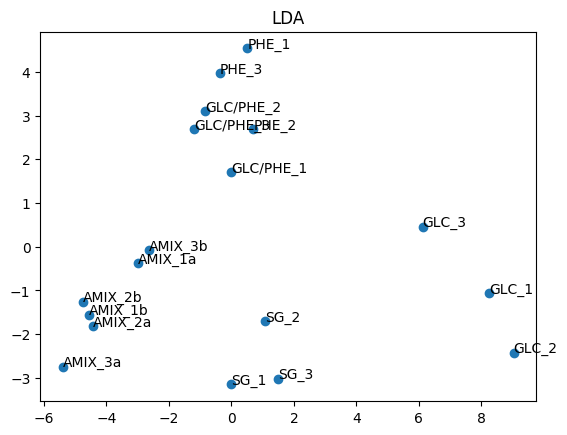

In [27]:
#plot the data
plt.scatter(lda_df['LD 1'], lda_df['LD 2'])

#add the lables

for i,txt in enumerate(labels):
    plt.annotate(txt, (lda_df['LD 1'][i], lda_df['LD 2'][i]))
    #print(i, txt)


plt.title('LDA')

In [31]:
# define and run t-SME
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_data = tsne.fit_transform(scaled_data)

#convert to data frame
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE 1', 'TSNE 2'])

#add group names
tsne_df['group_label'] = group_labels

tsne_df

,TSNE 1,TSNE 2,group_label
0,-63.502644,-14.914408,SG
1,-42.574898,-3.591646,SG
2,-57.752701,-0.730309,SG
3,81.740761,-28.503828,GLC
4,90.779083,-40.816299,GLC
5,72.085190,-43.911339,GLC
6,1.939904,-60.854977,PHE
7,16.117838,-72.951431,PHE
8,30.430450,-68.639511,PHE
9,8.258851,-32.084671,GLC/PHE


Text(0.5, 1.0, 'TSNE')

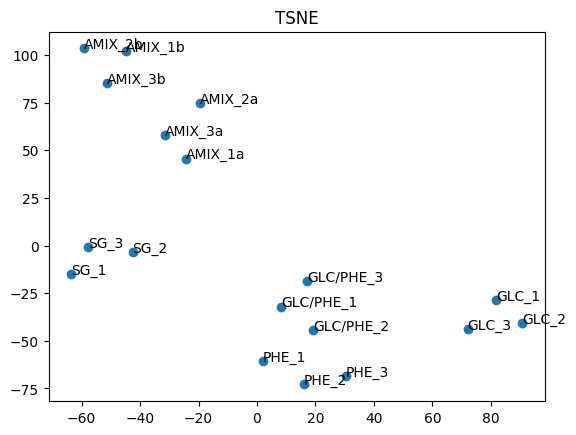

In [32]:
#plot the data
plt.scatter(tsne_df['TSNE 1'], tsne_df['TSNE 2'])

#add the lables

for i,txt in enumerate(labels):
    plt.annotate(txt, (tsne_df['TSNE 1'][i], tsne_df['TSNE 2'][i]))
    #print(i, txt)


plt.title('TSNE')